In [1]:
import matplotlib.pyplot as plt
import numpy as np
from svdutils_Zhicai import train_model, get_err, train_model_bias, get_err_bias

In [2]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies

## Task 1: use the code from homework 5

In [3]:
train_model(M, N, 20, 0.03, 0.12, Y_train, 1e-5, 300, True)

Initial error = 6.9180975279455375
After epoch: 0, error = 0.5000699286023484, eps = 0.9277156867791579
After epoch: 1, error = 0.4342149917584362, eps = 0.010260930764874202
After epoch: 2, error = 0.4152182372777319, eps = 0.0029599053894140957
After epoch: 3, error = 0.39665684594209333, eps = 0.002892070974817575
After epoch: 4, error = 0.3886882925949242, eps = 0.0012415891368221298
After epoch: 5, error = 0.3830434354039598, eps = 0.0008795314609650636
After epoch: 6, error = 0.37485608025186834, eps = 0.001275680888771706
After epoch: 7, error = 0.3679563050833031, eps = 0.0010750616231802006
After epoch: 8, error = 0.3631916956635816, eps = 0.0007423790792375392
After epoch: 9, error = 0.365995548414759, eps = 0.00043687140757455383
After epoch: 10, error = 0.356179819325788, eps = 0.001529399638290044
After epoch: 11, error = 0.3523932538624742, eps = 0.0005899889654106983
After epoch: 12, error = 0.34880273984613125, eps = 0.0005594419719713295
After epoch: 13, error = 0.3473

(array([[ 0.04769125,  0.434301  , -0.12319558, ..., -0.72516245,
         -0.72517747,  0.21054406],
        [-0.39380902,  0.70011498, -0.08234387, ..., -0.43208216,
         -0.88016893,  0.19213989],
        [-0.62205755,  0.23867924,  0.38462837, ..., -0.04889735,
         -0.54138122,  0.22437074],
        ...,
        [-0.20920095,  0.57386861,  0.20273295, ..., -0.40652077,
         -1.02012908, -0.1316605 ],
        [-0.29452913,  0.40278357, -0.01055302, ..., -0.45548395,
         -0.99405291, -0.08634439],
        [-0.72506309,  0.50681052,  0.32144616, ..., -0.53206946,
         -0.64213369,  0.27160957]]),
 array([[-0.38116929,  0.40053915,  0.11106199, ..., -0.5372568 ,
         -1.07390957,  0.08983654],
        [-0.28932393,  0.45379836,  0.15374852, ..., -0.7119425 ,
         -0.8930071 ,  0.10265727],
        [-0.09073358, -0.01814441,  0.27836195, ..., -0.72461687,
         -0.59189784,  0.49659657],
        ...,
        [-0.30242478,  0.18973352, -0.33465213, ..., -

In [4]:
## scan E_in and E_out for different lambda
regs = [10**-3, 10**-2, 0.06, 0.08, 10**-1, 0.12, 0.14, 0.20, 1.0]
eta = 0.03
K = 20
E_ins_vs_lambda = np.zeros(len(regs))
E_outs_vs_lambda = np.zeros(len(regs))

for idx in range(len(regs)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, regs[idx]))
    U,V, e_in = train_model(M, N, K, eta, regs[idx], Y_train)
    E_ins_vs_lambda[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_lambda[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.001
E_in = 0.2366, E_out = 0.6906
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.01
E_in = 0.2073, E_out = 0.5827
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.06
E_in = 0.2477, E_out = 0.4681
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.08
E_in = 0.2571, E_out = 0.4393
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.3018, E_out = 0.4482
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.12
E_in = 0.3620, E_out = 0.4581
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.14
E_in = 0.3482, E_out = 0.4495
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.2
E_in = 0.4232, E_out = 0.4749
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 1.0
E_in = 0.9405, E_out = 0.9582


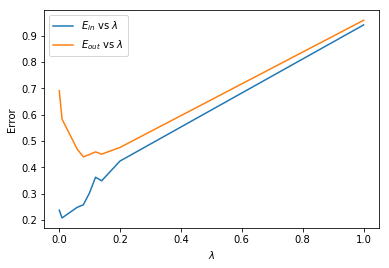

In [5]:
#plot E_in and E_out vs. lambda
plt.plot(regs, E_ins_vs_lambda, label='$E_{in}$ vs $\lambda$')
plt.plot(regs, E_outs_vs_lambda, label='$E_{out}$ vs $\lambda$')
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.legend()
plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.pdf')
plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.png')

In [6]:
print(np.argmin(E_ins_vs_lambda))
print(regs[np.argmin(E_ins_vs_lambda)])
print(np.argmin(E_outs_vs_lambda))
print(regs[np.argmin(E_outs_vs_lambda)])

1
0.01
3
0.08


In [7]:
## scan E_in and E_out for different eta
## scan E_in and E_out for different lambda
reg = 0.10
etas = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
K = 20
E_ins_vs_eta = np.zeros(len(etas))
E_outs_vs_eta = np.zeros(len(etas))

for idx in range(len(etas)):
    print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, etas[idx], reg))
    U,V, e_in = train_model(M, N, K, etas[idx], reg, Y_train)
    E_ins_vs_eta[idx] = e_in
    eout = get_err(U, V, Y_test)
    E_outs_vs_eta[idx] = eout
    print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))

Training model with M = 943, N = 1682, k = 20, eta = 0.001, reg = 0.1
E_in = 0.3013, E_out = 0.4237
Training model with M = 943, N = 1682, k = 20, eta = 0.01, reg = 0.1
E_in = 0.3040, E_out = 0.4340
Training model with M = 943, N = 1682, k = 20, eta = 0.02, reg = 0.1
E_in = 0.2879, E_out = 0.4343
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.1
E_in = 0.2875, E_out = 0.4430
Training model with M = 943, N = 1682, k = 20, eta = 0.04, reg = 0.1
E_in = 0.2967, E_out = 0.4586
Training model with M = 943, N = 1682, k = 20, eta = 0.05, reg = 0.1
E_in = 0.3360, E_out = 0.4742
Training model with M = 943, N = 1682, k = 20, eta = 0.1, reg = 0.1
E_in = 0.3852, E_out = 0.5299


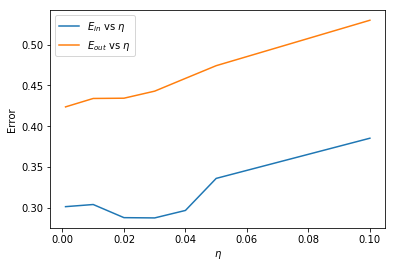

In [8]:
#plot E_in and E_out vs. eta
plt.clf()
plt.plot(etas, E_ins_vs_eta, label='$E_{in}$ vs $\eta$')
plt.plot(etas, E_outs_vs_eta, label='$E_{out}$ vs $\eta$')
plt.xlabel('$\eta$')
plt.ylabel('Error')
plt.legend()
plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.pdf')
plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.png')

In [9]:
print(np.argmin(E_ins_vs_eta))
print(regs[np.argmin(E_ins_vs_eta)])
print(np.argmin(E_outs_vs_eta))
print(regs[np.argmin(E_outs_vs_eta)])

3
0.08
0
0.001


In [10]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT, VT, e_in = train_model(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err(UT, VT, Y_test)

Initial error = 6.929805224042088
After epoch: 0, error = 0.4998904504126567, eps = 0.9278637083942345
After epoch: 1, error = 0.4311332208506442, eps = 0.010693334512613104
After epoch: 2, error = 0.40431131970611045, eps = 0.004171424052856281
After epoch: 3, error = 0.38682522359776095, eps = 0.0027194911167507277
After epoch: 4, error = 0.3744548148921328, eps = 0.0019238837746904634
After epoch: 5, error = 0.36382778467404037, eps = 0.0016527482233009256
After epoch: 6, error = 0.3564140413518085, eps = 0.0011530080231603316
After epoch: 7, error = 0.34519075301250646, eps = 0.0017454801089014948
After epoch: 8, error = 0.3425880182378913, eps = 0.00040478526796180304
After epoch: 9, error = 0.3322951228356149, eps = 0.0016007825553909284
After epoch: 10, error = 0.3253568580707013, eps = 0.0010790601445246264
After epoch: 11, error = 0.32201832019097143, eps = 0.0005192196160082854
After epoch: 12, error = 0.3174384473433219, eps = 0.0007122758246240938
After epoch: 13, error = 0

In [11]:
## read the movies.txt file, get the list of all movies ids, names, and their genres
ratings_all = np.loadtxt('data/data.txt')
movies_all = []
with open('data/movies.txt') as f:
    lines = f.readlines()  
    for line in lines:
        line_items = line.strip('\n').split(';')
        line_items_int_str = []
        for idx in range(len(line_items)):
            if idx == 1:
                line_items_int_str.append(line_items[idx][0:line_items[idx].find('(')]) #remove the year of the movie from the name
            else:
                line_items_int_str.append(int(line_items[idx]))
        movies_all.append(line_items_int_str)

In [12]:
## 10 random movies, 10 most popular movies, and 10 best movies
average_ratings_all = np.zeros(len(movies_all))
num_of_ratings_all = np.zeros(len(movies_all))
for rating in ratings_all:
    num_of_ratings_all[int(rating[1])-1] += 1
    average_ratings_all[int(rating[1])-1] += rating[2]
average_ratings_all = np.divide(average_ratings_all, num_of_ratings_all)
id_most_popular_10 = num_of_ratings_all.argsort()[-10:][::-1]
id_best_10 = average_ratings_all.argsort()[-10:][::-1]

name_most_popular_10 = []
for idx in range(len(id_most_popular_10)):
    name_most_popular_10.append(movies_all[id_most_popular_10[idx]][1])
    
name_best_10 = []
for idx in range(len(id_best_10)):
    name_best_10.append(movies_all[id_best_10[idx]][1])
    #print(average_ratings_all[id_best_10[idx]])
    #print(num_of_ratings_all[id_best_10[idx]])

## 10 random movies
id_all = np.arange(len(movies_all))
np.random.shuffle(id_all)
id_random10 = id_all[:10]
name_random10 = []
for idx in range(len(id_random10)):
    name_random10.append(movies_all[id_random10[idx]][1])

## 10 random movies of genre = action
print(id_all)
id_random_action = []
id_random_documentary = []
id_random_drama = []
name_random_action = []
name_random_documentary = []
name_random_drama = []

for idx in id_all:
    if movies_all[idx][3] == 1 and num_of_ratings_all[idx] > 50:
        id_random_action.append(idx)
        name_random_action.append(movies_all[idx][1])
    if movies_all[idx][9] == 1 and num_of_ratings_all[idx] > 20:
        id_random_documentary.append(idx)
        name_random_documentary.append(movies_all[idx][1])
    if movies_all[idx][10] == 1 and num_of_ratings_all[idx] > 50:
        id_random_drama.append(idx)
        name_random_drama.append(movies_all[idx][1])

id_random10_action = id_random_action[:10]
name_random10_action = name_random_action[:10]
id_random10_documentary = id_random_documentary[:10]
name_random10_documentary = name_random_documentary[:10]
id_random10_drama = id_random_drama[:10]
name_random10_drama = name_random_drama[:10]

print('10 random movies')
print(id_random10)
print(name_random10)
print('10 random action movies')
print(id_random10_action)
print(name_random10_action)
print('10 random documentary movies')
print(id_random10_documentary)
print(name_random10_documentary)
print('10 random drama movies')
print(id_random10_drama)
print(name_random10_drama)

print('10 most popular movies')
print(id_most_popular_10)
print(name_most_popular_10)
print('10 best movies')
print(id_best_10)
print(name_best_10)

[1667 1611  184 ...  723  766  644]
10 random movies
[1667 1611  184   82 1353  908   29 1670  787 1488]
['Wedding Bell Blues ', 'Leading Man, The ', 'Psycho ', 'Much Ado About Nothing ', 'Venice/Venice ', 'Dangerous Beauty ', 'Belle de jour ', 'Further Gesture, A ', 'Relative Fear ', 'Chasers ']
10 random action movies
[61, 185, 91, 878, 294, 430, 221, 100, 225, 327]
['Stargate ', 'Blues Brothers, The ', 'True Romance ', 'Peacemaker, The ', 'Breakdown ', 'Highlander ', 'Star Trek: First Contact ', 'Heavy Metal ', 'Die Hard 2 ', 'Conspiracy Theory ']
10 random documentary movies
[1141, 47, 846, 1083, 633, 1021, 812, 643, 1064, 31]
['When We Were Kings ', 'Hoop Dreams ', 'Looking for Richard ', 'Anne Frank Remembered ', "Microcosmos: Le peuple de l'herbe ", 'Fast, Cheap & Out of Control ', 'Celluloid Closet, The ', 'Thin Blue Line, The ', 'Koyaanisqatsi ', 'Crumb ']
10 random drama movies
[657, 631, 370, 467, 286, 1100, 50, 761, 695, 181]
['Pump Up the Volume ', "Sophie's Choice ", 'Bri

In [13]:
def visualize_V(Vtilt, id_movie, name_movie, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    Vtilt: 2xn matrix 
    id_movie: the id of the movies to visualize
    name_movie: the names of the movies to visualize
    figname: the figure name you want to save
    """   
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(id_movie)):
        plt.text(Vtilt[0][id_movie[idx]], Vtilt[1][id_movie[idx]], name_movie[idx], 
                 rotation=45, bbox=dict(facecolor='red', alpha=0.05), fontsize=6,
                 horizontalalignment='center', verticalalignment='center')
        #print(str(Vtilt[0][id_movie[idx]])+', '+str(Vtilt[1][id_movie[idx]])+', '+name_movie[idx])
    #plt.xlim(-1.0*np.amax(Vtilt[0]), np.amax(Vtilt[0]))
    #plt.ylim(-1.0*np.amax(Vtilt[1]), np.amax(Vtilt[1]))
    plt.xlim(np.amin(Vtilt[0]), np.amax(Vtilt[0]))
    plt.ylim(np.amin(Vtilt[1]), np.amax(Vtilt[1]))
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0)
    #plt.show()
    plt.savefig('plots/'+figname+'.pdf')
    plt.savefig('plots/'+figname+'.png')


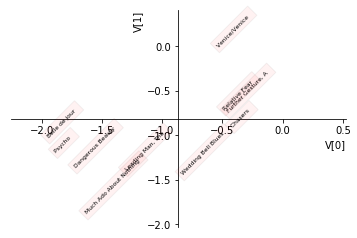

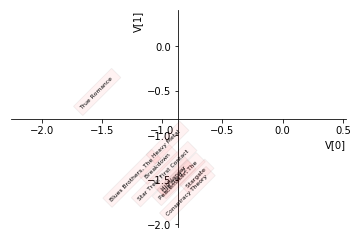

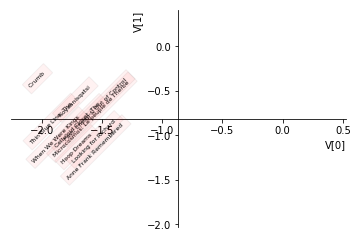

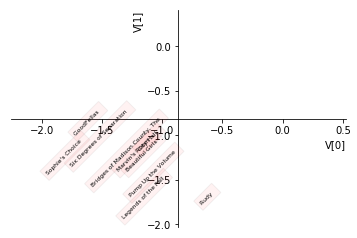

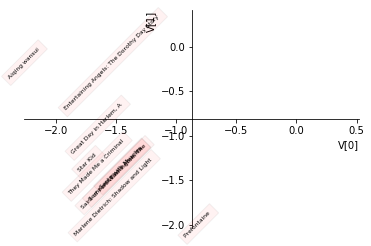

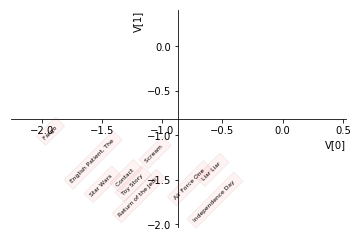

In [14]:
## perform SVD to V and get the A, Sigma, B
U = UT.transpose()
V = VT.transpose()
Vp = np.zeros_like(V)
V_row_means = np.mean(V, axis=1)
for irow in range(len(V)):
    Vp[irow] = V[irow] - V_row_means[irow]
A, S, B =  np.linalg.svd(Vp)
A12 = A[:,[0,1]]
A12T = A12.transpose()
Vtilt = np.matmul(A12T, V)

## visualize the movies of choices
visualize_V(Vtilt, id_random10, name_random10, 'visualize_V_random10movies')
visualize_V(Vtilt, id_random10_action, name_random10_action, 'visualize_V_random10movies_action')
visualize_V(Vtilt, id_random10_documentary, name_random10_documentary, 'visualize_V_random10movies_documentary')
visualize_V(Vtilt, id_random10_drama, name_random10_drama, 'visualize_V_random10movies_drama')
visualize_V(Vtilt, id_best_10, name_best_10, 'visualize_V_best10movies')
visualize_V(Vtilt, id_most_popular_10, name_most_popular_10, 'visualize_V_mostpopular10movies')

## task 2: add bias term

In [15]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT_bias, VT_bias, a_bias, b_bias, e_in = train_model_bias(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err_bias(UT_bias, VT_bias, Y_test, a_bias, b_bias)

Initial error = 6.926907676231831
After epoch: 0, error = 0.5280271664565439, eps = 0.9237715888334481
After epoch: 1, error = 0.4597714557729273, eps = 0.010666820638289057
After epoch: 2, error = 0.42078850036764276, eps = 0.006092152423495325
After epoch: 3, error = 0.4155837841830564, eps = 0.0008133791804105936
After epoch: 4, error = 0.397487324737513, eps = 0.002828066474736984
After epoch: 5, error = 0.3830280775599661, eps = 0.0022596526307153537
After epoch: 6, error = 0.37711610357631653, eps = 0.0009239075451742073
After epoch: 7, error = 0.36958644161761445, eps = 0.0011767155125336926
After epoch: 8, error = 0.3610926951869589, eps = 0.0013273800655724099
After epoch: 9, error = 0.3590894413928359, eps = 0.0003130631664496228
After epoch: 10, error = 0.34687227779394236, eps = 0.001909265781761341
After epoch: 11, error = 0.3445087206980129, eps = 0.0003693704066389028
After epoch: 12, error = 0.34219281301168497, eps = 0.0003619238838403116
After epoch: 13, error = 0.336

After epoch: 112, error = 0.2895625978078234, eps = 0.0006397839004048047
After epoch: 113, error = 0.29239168010367755, eps = 0.00044212144476401665
After epoch: 114, error = 0.29052052670701173, eps = 0.00029241886823911577
After epoch: 115, error = 0.2873771989467615, eps = 0.000491230888816927
After epoch: 116, error = 0.2891657722121991, eps = 0.00027951346531713666
After epoch: 117, error = 0.291406666023883, eps = 0.00035020091534145606
After epoch: 118, error = 0.2848375310536734, eps = 0.0010266069135334273
After epoch: 119, error = 0.2908645848885704, eps = 0.0009418919177643309
After epoch: 120, error = 0.28885415327232516, eps = 0.0003141848973697835
After epoch: 121, error = 0.2882816369937544, eps = 8.947131888087879e-05
After epoch: 122, error = 0.2958610503590462, eps = 0.001184490529822059
After epoch: 123, error = 0.2823323082372692, eps = 0.002114235779385121
After epoch: 124, error = 0.28651731193267416, eps = 0.0006540212290277543
After epoch: 125, error = 0.297793

After epoch: 222, error = 0.2858606889226508, eps = 2.680937484651537e-05
After epoch: 223, error = 0.28503405602480714, eps = 0.0001291839871960215
After epoch: 224, error = 0.2931395248475779, eps = 0.0012667010753503489
After epoch: 225, error = 0.2835364008309651, eps = 0.0015007506394192729
After epoch: 226, error = 0.2869232804741769, eps = 0.0005292925282848836
After epoch: 227, error = 0.2828939080309596, eps = 0.0006296995915241475
After epoch: 228, error = 0.28992791959916697, eps = 0.001099256589877218
After epoch: 229, error = 0.283885543044488, eps = 0.0009442865115934442
After epoch: 230, error = 0.2836095809773267, eps = 4.312661671673974e-05
After epoch: 231, error = 0.2821608066117192, eps = 0.00022641059844675113
After epoch: 232, error = 0.2873479768395548, eps = 0.0008106371450305083
After epoch: 233, error = 0.2851151036346865, eps = 0.000348947476274522
After epoch: 234, error = 0.289421278137248, eps = 0.0006729574799815586
After epoch: 235, error = 0.29206641861

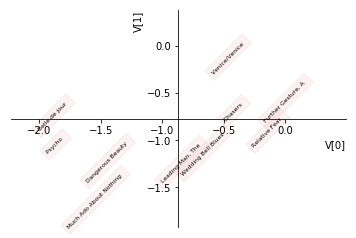

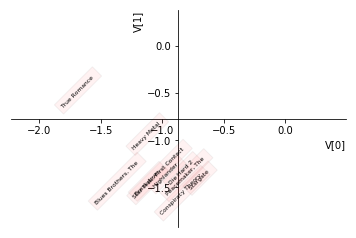

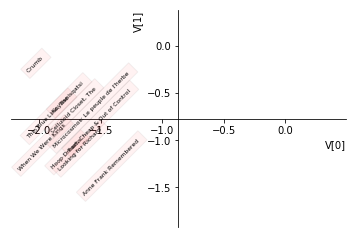

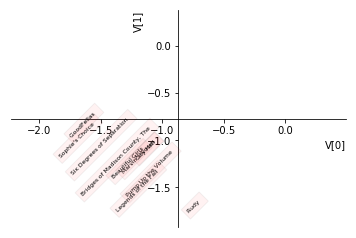

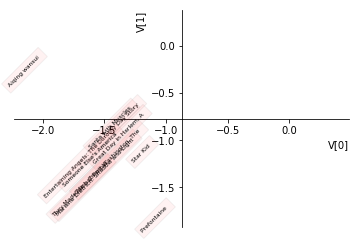

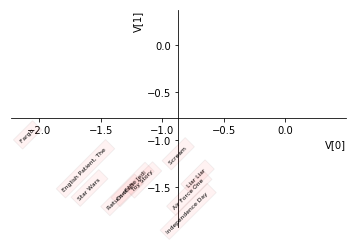

In [16]:
## perform SVD to V and get the A, Sigma, B
U_bias = UT_bias.transpose()
V_bias = VT_bias.transpose()
Vp_bias = np.zeros_like(V_bias)
V_bias_row_means = np.mean(V_bias, axis=1)
for irow in range(len(V)):
    Vp_bias[irow] = V_bias[irow] - V_bias_row_means[irow]
A_bias, S_bias, B_bias =  np.linalg.svd(Vp_bias)
A12_bias = A_bias[:,[0,1]]
A12T_bias = A12_bias.transpose()
Vtilt_bias = np.matmul(A12T_bias, V_bias)

## visualize the movies of choices
visualize_V(Vtilt_bias, id_random10, name_random10, 'visualize_V_bias_random10movies')
visualize_V(Vtilt_bias, id_random10_action, name_random10_action, 'visualize_V_bias_random10movies_action')
visualize_V(Vtilt_bias, id_random10_documentary, name_random10_documentary, 'visualize_V_bias_random10movies_documentary')
visualize_V(Vtilt_bias, id_random10_drama, name_random10_drama, 'visualize_V_bias_random10movies_drama')
visualize_V(Vtilt_bias, id_best_10, name_best_10, 'visualize_V_bias_best10movies')
visualize_V(Vtilt_bias, id_most_popular_10, name_most_popular_10, 'visualize_V_bias_mostpopular10movies')